In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/user_reviews.csv")
data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# Data Cleaning

In [10]:
data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [16]:
data.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
64222    False
64223    False
64226    False
64227    False
64230    False
Length: 37427, dtype: bool

In [17]:
data = data.drop_duplicates(keep='first')

In [18]:
data.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
64222    False
64223    False
64226    False
64227    False
64230    False
Length: 29692, dtype: bool

# Data Preprocessing

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [19]:
data["Sentiment"].value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Sentiment'] = encoder.fit_transform(data['Sentiment'])
data.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_16884\4215439353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = encoder.fit_transform(data['Sentiment'])


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,2,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,2,0.40,0.875000
4,10 Best Foods for You,Best idea us,2,1.00,0.300000
5,10 Best Foods for You,Best way,2,1.00,0.300000


In [21]:
data['Sentiment'].value_counts()

2    19015
0     6321
1     4356
Name: Sentiment, dtype: int64

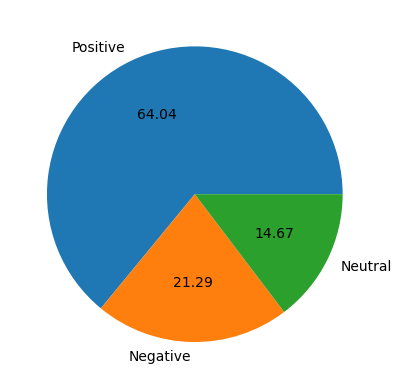

In [22]:
# Visualizing

plt.pie(data['Sentiment'].value_counts(), labels =['Positive','Negative','Neutral'], autopct='%0.2f')
plt.show()

In [24]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
ps = PorterStemmer()

In [25]:
def transform_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [26]:
data['Transformed_Review'] = data['Translated_Review'].apply(transform_text)

C:\Users\asus\AppData\Local\Temp\ipykernel_16884\1078431358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transformed_Review'] = data['Translated_Review'].apply(transform_text)


In [27]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Transformed_Review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2,1.00,0.533333,like eat delici food cook food case best food ...
1,10 Best Foods for You,This help eating healthy exercise regular basis,2,0.25,0.288462,help eat healthi exercis regular basi
3,10 Best Foods for You,Works great especially going grocery store,2,0.40,0.875000,work great especi go groceri store
4,10 Best Foods for You,Best idea us,2,1.00,0.300000,best idea us
5,10 Best Foods for You,Best way,2,1.00,0.300000,best way


In [28]:
print(data['Transformed_Review'])

0        like eat delici food cook food case best food ...
1                    help eat healthi exercis regular basi
3                       work great especi go groceri store
4                                             best idea us
5                                                 best way
                               ...                        
64222    ad older mani agent much owner post detail rep...
64223    photo post portal load fit purpos sure storag ...
64226    dumb app want post properti rent give option w...
64227    properti busi got link sm happi perform still ...
64230    useless app search flat kondapur hyderabad non...
Name: Transformed_Review, Length: 29692, dtype: object


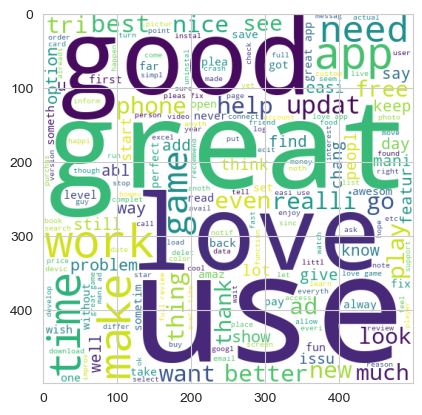

In [29]:
## Word Cloud Formation of Positive
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

Positive_wc = wc.generate(data[data['Sentiment'] == 2]['Transformed_Review'].str.cat(sep = " "))

plt.imshow(Positive_wc)

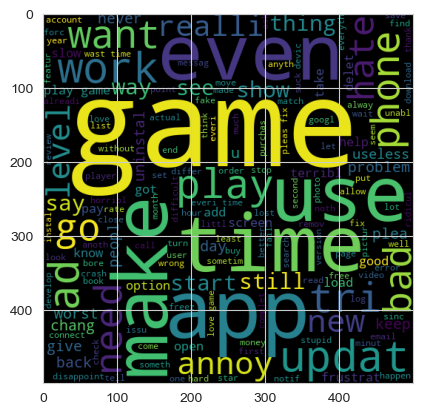

In [30]:
## Word Cloud Formation of Negative
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'black')

Negative_wc = wc.generate(data[data['Sentiment'] == 0]['Transformed_Review'].str.cat(sep = " "))

plt.imshow(Negative_wc)

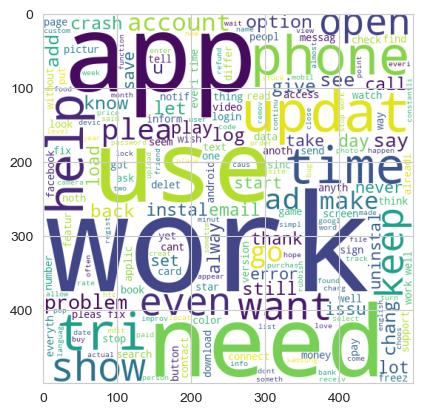

In [31]:
## Word Cloud Formation of Neutral
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

Neutral_wc = wc.generate(data[data['Sentiment']== 1]['Transformed_Review'].str.cat(sep = " "))

plt.imshow(Neutral_wc)

# Model Building

In [32]:
X = data['Transformed_Review'].values
y = data['Sentiment'].values

In [33]:
print(X)

['like eat delici food cook food case best food help lot also best shelf life'
 'help eat healthi exercis regular basi'
 'work great especi go groceri store' ...
 'dumb app want post properti rent give option websit work wast time space phone'
 'properti busi got link sm happi perform still guy need rais bar guy cheer'
 'useless app search flat kondapur hyderabad none number reachabl know flat unavail would keep post activ']


In [34]:
print(y)

[2 2 2 ... 0 2 0]


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [37]:
print(X_train)

  (0, 6290)	1.0
  (1, 9350)	0.22372302820079257
  (1, 2941)	0.3536501294062875
  (1, 10597)	0.17345767542720222
  (1, 452)	0.19228731825067724
  (1, 4957)	0.2306029168953038
  (1, 11698)	0.25894070995245366
  (1, 3539)	0.14578446226256203
  (1, 7451)	0.1726624695889301
  (1, 4418)	0.1604894535217237
  (1, 3583)	0.3240181175106572
  (1, 2149)	0.3196456544756981
  (1, 365)	0.18077594494531882
  (1, 535)	0.2808298577430891
  (1, 9202)	0.2695206013259936
  (1, 6074)	0.3701049390631191
  (1, 7091)	0.18011623742721242
  (2, 4215)	1.0
  (3, 7864)	0.11364243398876668
  (3, 463)	0.18107533992350924
  (3, 1377)	0.2227696028959455
  (3, 6303)	0.2544792828385771
  (3, 9476)	0.12577071697729567
  (3, 8372)	0.15758733925411939
  (3, 5319)	0.1812832214390666
  :	:
  (23750, 212)	0.2874467786295485
  (23750, 4398)	0.633736279067365
  (23750, 5252)	0.26294541434921875
  (23750, 7429)	0.19745001302508836
  (23750, 1004)	0.26931269817497727
  (23750, 6083)	0.20190796343711015
  (23750, 4512)	0.2723312046

In [39]:
print(X_test)

  (0, 11937)	0.18036122080916153
  (0, 7955)	0.3781985686705577
  (0, 7606)	0.36683633491851686
  (0, 7051)	0.18212207147587717
  (0, 6131)	0.15143983280630383
  (0, 5087)	0.3164246880946082
  (0, 4512)	0.15193262735381685
  (0, 3584)	0.3133165088277644
  (0, 1549)	0.24579300319105332
  (0, 531)	0.28054055358277014
  (0, 132)	0.4306323122508276
  (0, 115)	0.2963571696739147
  (1, 11358)	0.5099584741412083
  (1, 8576)	0.5876226010580671
  (1, 3259)	0.6282054069946568
  (2, 757)	0.7584736569780477
  (2, 365)	0.6517036992915928
  (3, 11419)	0.31715259744704816
  (3, 10841)	0.23202679601124893
  (3, 8857)	0.27054446177869107
  (3, 8436)	0.2636761196358613
  (3, 7944)	0.3685053732226703
  (3, 7533)	0.354290204116499
  (3, 7459)	0.24270097247146546
  (3, 7222)	0.23751180345767606
  :	:
  (5936, 3665)	0.26460842445236904
  (5936, 2672)	0.21585226752555012
  (5936, 508)	0.4973542210807041
  (5936, 458)	0.16393920993003036
  (5936, 431)	0.1723068786881128
  (5937, 10686)	0.1999379441023454
  (5

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)

In [41]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8775888196666105
[[ 918   61  274]
 [  36  672  157]
 [ 116   83 3622]]
